<center><font size="+4">Programming & Data Analytics & AI 1 2025/2026</font></center>
<center><font size="+2">Sant'Anna School of Advanced Studies, Pisa, Italy</font></center>
<center><img src="https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/raw/main/PDAI/jupyter/jupyterNotebooks/images/sssaLEMBEDSdtu.png" width="900" alt="L'EMbeDS"></center>

<center><font size="+2">Course responsible</font></center>
<center><font size="+2">Andrea Vandin a.vandin@santannapisa.it</font></center>

---

<center><font size="+4">Lecture 4: </font></center>
<center><font size="+2"> Creation of word clouds for COVID-related online news</font></center>
</center>

---

In [ ]:
from IPython.display import Image, display
url_github_repo="https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20252026/raw/main/PDAI/"

# Computing and visulatizing the most important words in online news

This example shows that functions can hide a lot of complexity.
* E.g., we can download remote data by just invoking a function
* In particular, in this example we will:
    1. Download all the articles from the online service [NewsAPI](https://newsapi.org/)
         - An online service is like a function running on the internet...
    2. Combine the articles into one document (`str`)
    3. Clean data
    4. Compute word-frequency pairs
        - Word 'ciao' appears 3 times, word 'hello' appears 6 times ...
    5. Visualize the analysis in a Word Cloud
    
 

*Some definitions:*

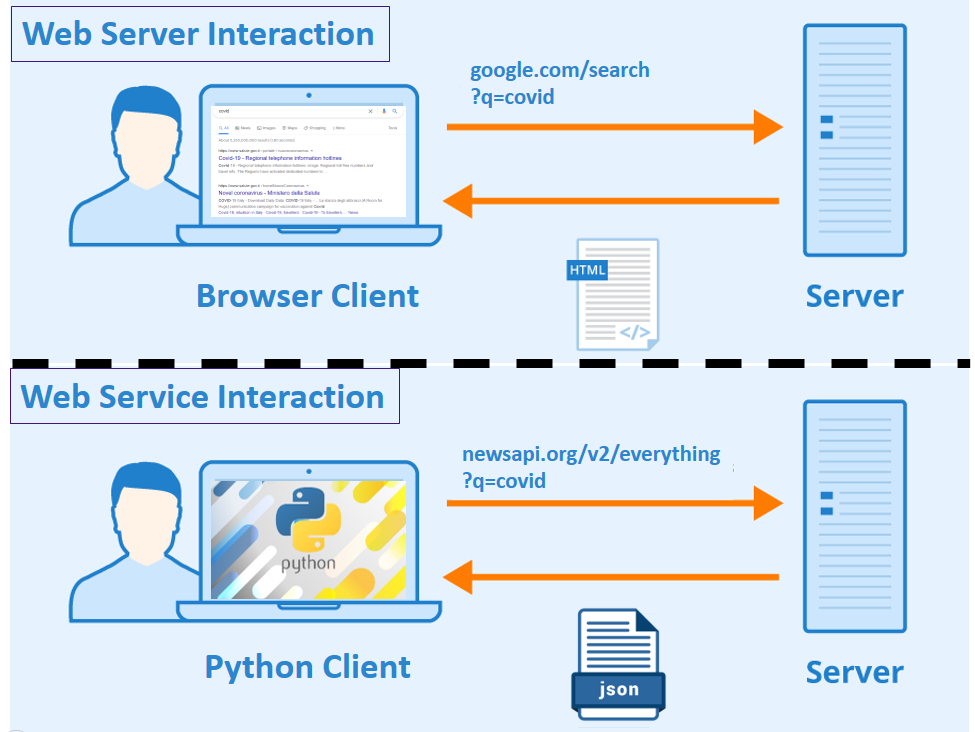

In [5]:
from IPython.display import Image, display
url_github_repo="https://github.com/EMbeDS-education/StatsAndComputing20232024/raw/main/PDAI/"
img=Image(url_github_repo+'jupyter/jupyterNotebooks/images/web_server_web_service.png',width=800)
display(img)

A **web service** is an application run by a web server (a remote computer connected to the interent). 
- The service can be called/invoked from some other computers connected to the internet 
- The service will _return_ data in a format that can't be sent over the internet
  - A little bit like a webpage, which is loaded from some remote server, and visualized in a browser
  - However, here data is not visualized but sent in a format that can be processed by programs.
  - Examples of used formats are XML (especially SOAP or so) or JSON.

An **Application Programming Interface (API)** allows two programs to communicate with one another. 
- An API defines the functions for one software program to interact with the other. 

This document has been __created by Daniele Licari__ and elaborated by Andrea Vandin.

# The modules we need to use

In [6]:
%pip install newsapi-python
%pip install wordcloud


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
#We might also get some errors like 'Only supported for TrueType fonts'
#We can fix them running these installations

%pip install --upgrade pip 
%pip install --upgrade Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 15.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: Pillow
    Found existing installation: Pillow 10.1.0
    Uninstalling Pillow-10.1.0:
      Successfully uninstalled Pillow-10.1.0
Note: you may need to restart the kernel to use updated packages.


In [36]:
# integrating News API into your Python application 
from newsapi import NewsApiClient 

# creating wordclouds into your Python application 
from wordcloud import WordCloud, STOPWORDS

#  In Python, string.punctuation will give the sets of all punctuations. 
import string

import matplotlib.pyplot as plt

In [38]:
#STOPWORDS

__NewsApiClient__ is a local client for the online service [__NewsAPI__](https://newsapi.org/) that allows you to get news from [eveywhere in the world](https://newsapi.org/sources)
* Intuitively, an online service is like an online function running in a remote server (computer)
* A local client is a piece of code runnning in your machine that communicates with the online service
  * It allows you to easily interact with the online service
  * The interaction is typically done through a set of message exchanges as prescribed by the APIs of the service
* We need a `api_key` that is a univoque identifier 
  * necessary when making requests to be identified
  * __can be obtained registering [here](https://newsapi.org/register)__

There exist many online services accessible with Python (e.g. [Twitter API](https://www.tweepy.org/))
* Most of them follow this api-key approach
* E.g. to enforce subscriptions
<!-- * In our case, __we are using a free subscription that allows us to only get the first 250 characters from a news item__ -->

# Data loading

We first get the most relevant articles (top 100) about coronavirus, published in usa-today
* This looks like a [normal function invocation](https://newsapi.org/docs/client-libraries/python)
* But under the hood a lot happens to contact the remote service 
(https://newsapi.org/v2/everything?q=coronavirus&sources=usa-today&language=en&pageSize=100&sortBy=relevancy&apiKey=1f6979fc955b465f9b076310217a19a3)

Luckily, the function `get_everything` hides this complexity to us

In [9]:
#
#Guide from:
# https://newsapi.org/docs/client-libraries/python
#

# from newsapi import NewsApiClient

# # Init
# newsapi = NewsApiClient(api_key='1f6979fc955b465f9b076310217a19a3')

# # /v2/top-headlines
# top_headlines = newsapi.get_top_headlines(q='bitcoin',
#                                           sources='bbc-news,the-verge',
#                                           category='business',
#                                           language='en',
#                                           country='us')

# # /v2/everything
# all_articles = newsapi.get_everything(q='bitcoin',
#                                       sources='bbc-news,the-verge',
#                                       domains='bbc.co.uk,techcrunch.com',
#                                       #from_param='2017-12-01',
#                                       #to='2017-12-12',
#                                       language='en',
#                                       sort_by='relevancy',
#                                       page=2)

# # /v2/top-headlines/sources
# #sources = newsapi.get_sources()

In [39]:
my_api_key='1f6979fc955b465f9b076310217a19a3'
#newsapi = NewsApiClient(api_key='345f8a0aa8c64d549fde1d8343d036f8')
newsapi = NewsApiClient(api_key=my_api_key)
json_data = newsapi.get_everything(
                                    #q='coronavirus',        # All the articles that contain this word
                                    q='covid',
                                    #q='hamas',              # All the articles that contain this word
                                    language='en',
                                    #sources = 'usa-today', # The newspaper of interest
                                    sources = 'cnn', # The newspaper of interest
                                    #sources = 'bbc-news', # The newspaper of interest
                                    #sources = 'bbc-news,the-verge'
                                    #
                                    page_size=100,           # Get 100 articles
                                    sort_by='relevancy'
                                    )
#There exist many more parameters allowing us the ask for more articles, different sources, etc

#print(json_data)

In [11]:
#json_data

The return value `json_data` is just a dictionary collecting information about the remote request

In [40]:
print(type(json_data))
print()
print(json_data.keys())
print()
print('The status of the request is',json_data['status'],'There are ',json_data['totalResults'],'articles matching the request.')
print('We got',len(json_data['articles']),'articles')
print()

<class 'dict'>

dict_keys(['status', 'totalResults', 'articles'])

The status of the request is ok There are  49 articles matching the request.
We got 49 articles



In [41]:
articles = json_data['articles']

print(type(articles))
print(type(articles[0]))
print(articles[0].keys())

<class 'list'>
<class 'dict'>
dict_keys(['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content'])


In [14]:
first_article=articles[0]
first_article

{'source': {'id': 'cnn', 'name': 'CNN'},
 'author': 'CNN',
 'title': 'Airbnb Wants To Stage Gladiator Battles In The Actual Colosseum. Romans Are Appalled.',
 'description': 'Airbnb and the Colosseum Archaeological Park have signed a $1.5 million deal to offer 16 tourists a chance to “unleash their inner gladiator.” Colosseum officials say it will pay for site maintenance; many Romans object to both the bad taste of the idea and t…',
 'url': 'https://www.cnn.com/2024/11/15/travel/airbnb-gladiator-battles-colosseum-outrage/index.html',
 'urlToImage': 'https://media.cnn.com/api/v1/images/stellar/prod/gettyimages-1636657658.jpg?c=16x9&q=w_800,c_fill',
 'publishedAt': '2024-11-19T18:04:00Z',
 'content': 'For travel tips, recipes and more insight on Italian culture, sign up for CNNs Unlocking Italy newsletter. This eight-part guide will have you packing your bags in no time.\r\nThe ancient Colosseum in … [+5332 chars]'}

We can ignore all the metadata (i.e. the data about the remote request) and focus on the actual articles only

In [42]:
#Get the description of the first article
content = articles[0]['description']
print('The content is long',len(content),"characters")
print()
print('The content:')
print(content)

The content is long 260 characters

The content:
Airbnb and the Colosseum Archaeological Park have signed a $1.5 million deal to offer 16 tourists a chance to “unleash their inner gladiator.” Colosseum officials say it will pay for site maintenance; many Romans object to both the bad taste of the idea and t…


Now let's combine the content of all the news into variable `contents`

In [16]:
def combine_articles(list_of_articles):
    contents = ''
    for article in list_of_articles:
         #  check if key 'description' has Non-None value in dictionary 
        if article['description']:
            contents += article['description']+" "
            
    return contents

contents = combine_articles(articles)
print('Overall we have',len(contents),'characters')
contents

Overall we have 9250 characters


'Airbnb and the Colosseum Archaeological Park have signed a $1.5 million deal to offer 16 tourists a chance to “unleash their inner gladiator.” Colosseum officials say it will pay for site maintenance; many Romans object to both the bad taste of the idea and t… The Rev. William Barber, the prominent Black spiritual leader who supported Kamala Harris, suggests a way forward for left-leaning Americans who are struggling in the wake of the election. Chuck Woolery, the affable, smooth-talking game show host of “Wheel of Fortune,” “Love Connection” and “Scrabble” who later became a right-wing podcaster, skewering liberals and accusing the government of lying about COVID-19, has died. He was 83. The hangover has finally arrived for spirits and beer companies, as the surge in sales boosted by Americans who stayed at home during the Covid-19 pandemic has ended. A regional public health department in Idaho is no longer providing Covid-19 vaccines to residents in six counties after a narrow deci

# Data cleaning, manipulation and visualization 

## Implementing two functions for data cleaning

__Stop words__ are usually the most common words in any text ( like “the”, “of”, “to” and “and”), 
* They don’t tell us much about the actual content in a text
* These are the words we want to ignore - this is our data cleaning

We want to find the words that will help us differentiate a text from texts that are about different subjects. 
* __We will filter out the common words__.
* Of course, we are going to use a function for doing this

Furthermore, we want to ignore punctuation 
* In Python, string.punctuation will give the all sets of punctuation.
* We are going to use it to delete all punctuation from a string

In [17]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [18]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
# to remove STOPWORDS from a list of strings
def remove_stopwords(wordlist):
    return [ w for w in wordlist if w not in STOPWORDS ]

# to remove Punctuations from a string
def remove_punctuations(my_str): 
    no_punct = ""
    for char in my_str:
        if char  not in string.punctuation:
            no_punct = no_punct + char
    return no_punct

In [20]:
# for testing 
remove_punctuations('Andrea likes pizza and Python!! and you? . ' + "ciao")

'Andrea likes pizza and Python and you  ciao'

In [44]:
no_punct=remove_punctuations('Andrea likes pizza and Python!! and you? . ' + "ciao")
print(no_punct)
no_punct.split()

Andrea likes pizza and Python and you  ciao


['Andrea', 'likes', 'pizza', 'and', 'Python', 'and', 'you', 'ciao']

In [45]:
remove_stopwords(
    remove_punctuations('Andrea likes pizza and Python!! and you? . ' + "ciao").split()
    )

['Andrea', 'likes', 'pizza', 'Python', 'ciao']

## Actual cleaning, manipulation, visualization

Now begins the funny part
1. Let's clean the data removing not interesting words
2. Let's compute the frequency of use of words
3. Let's visualize graphically the computed analysis - Word Cloud

In [23]:
#contents

In [46]:
# 1 cleaning data
def clean_data(content_to_clean):
    print('Before cleaning')
    print(content_to_clean[:200])
    print()
    # simple text normalization: string in lower case
    content_to_clean = content_to_clean.lower()
    # remove punctuations
    cleaned_content = remove_punctuations(content_to_clean)
    # remove stopwords
    #   split the string in a list of words
    cleaned_content_words = cleaned_content.split()
    #   remove stop_words
    cleaned_content_words = remove_stopwords(cleaned_content_words)
    print('After cleaning')
    print(cleaned_content_words[:200])
    print()
    return cleaned_content_words

cleaned_content = clean_data(contents)
#cleaned_content

Before cleaning
Airbnb and the Colosseum Archaeological Park have signed a $1.5 million deal to offer 16 tourists a chance to “unleash their inner gladiator.” Colosseum officials say it will pay for site maintenance;

After cleaning
['airbnb', 'colosseum', 'archaeological', 'park', 'signed', '15', 'million', 'deal', 'offer', '16', 'tourists', 'chance', '“unleash', 'inner', 'gladiator”', 'colosseum', 'officials', 'say', 'will', 'pay', 'site', 'maintenance', 'many', 'romans', 'object', 'bad', 'taste', 'idea', 't…', 'rev', 'william', 'barber', 'prominent', 'black', 'spiritual', 'leader', 'supported', 'kamala', 'harris', 'suggests', 'way', 'forward', 'leftleaning', 'americans', 'struggling', 'wake', 'election', 'chuck', 'woolery', 'affable', 'smoothtalking', 'game', 'show', 'host', '“wheel', 'fortune”', '“love', 'connection”', '“scrabble”', 'later', 'became', 'rightwing', 'podcaster', 'skewering', 'liberals', 'accusing', 'government', 'lying', 'covid19', 'died', '83', 'hangover', 'finally'

In [25]:
# 2 computing word-frequency pairs
def analyze_data(cleaned_content):
    wordcount = {}
    for w in cleaned_content:
        if w in wordcount:
            #wordcount[w] += 1
            wordcount[w] = wordcount[w] + 1
        else:
            wordcount[w] = 1
    return wordcount

#wordcount = analyze_data(['ciao','ciao','andrea'])
wordcount = analyze_data(cleaned_content)
wordcount

{'airbnb': 1,
 'colosseum': 2,
 'archaeological': 1,
 'park': 1,
 'signed': 1,
 '15': 1,
 'million': 2,
 'deal': 1,
 'offer': 1,
 '16': 1,
 'tourists': 1,
 'chance': 1,
 '“unleash': 1,
 'inner': 1,
 'gladiator”': 1,
 'officials': 1,
 'say': 3,
 'will': 2,
 'pay': 1,
 'site': 1,
 'maintenance': 1,
 'many': 5,
 'romans': 1,
 'object': 1,
 'bad': 1,
 'taste': 1,
 'idea': 1,
 't…': 1,
 'rev': 1,
 'william': 1,
 'barber': 1,
 'prominent': 3,
 'black': 1,
 'spiritual': 1,
 'leader': 1,
 'supported': 1,
 'kamala': 1,
 'harris': 2,
 'suggests': 1,
 'way': 3,
 'forward': 1,
 'leftleaning': 1,
 'americans': 3,
 'struggling': 1,
 'wake': 1,
 'election': 9,
 'chuck': 1,
 'woolery': 1,
 'affable': 1,
 'smoothtalking': 1,
 'game': 1,
 'show': 1,
 'host': 2,
 '“wheel': 1,
 'fortune”': 1,
 '“love': 1,
 'connection”': 1,
 '“scrabble”': 1,
 'later': 1,
 'became': 1,
 'rightwing': 1,
 'podcaster': 1,
 'skewering': 1,
 'liberals': 1,
 'accusing': 1,
 'government': 3,
 'lying': 2,
 'covid19': 4,
 'died': 2

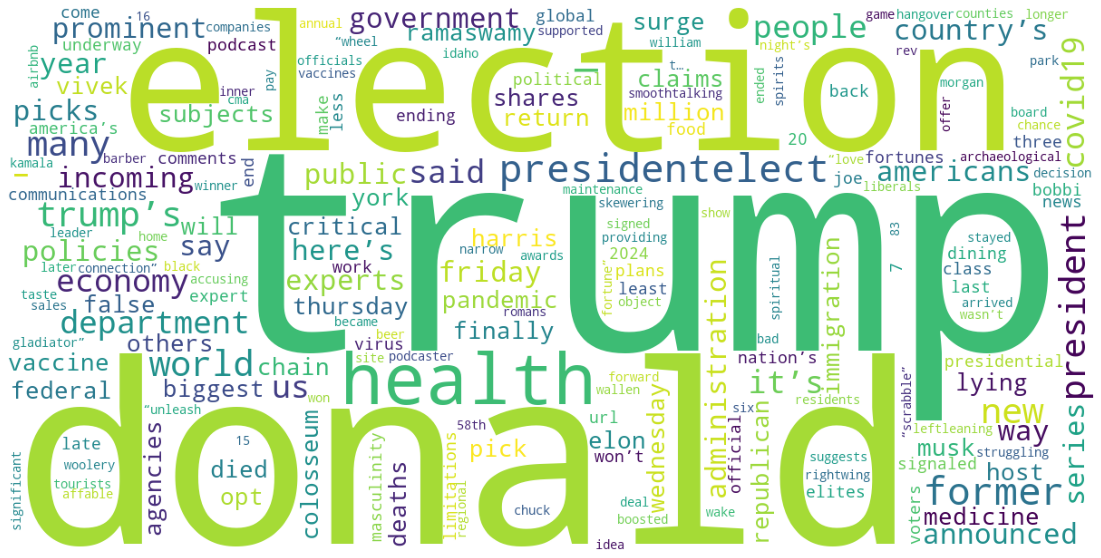

In [47]:
# 3 visualizing the analysisis in a Word Cloud
def visualize_data(wordcount):
    wordCloudMaker=WordCloud(width=1200,height=600, background_color='white')
    wc = wordCloudMaker.generate_from_frequencies(wordcount)
    plt.figure(figsize=(20,10))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

visualize_data(wordcount)

# Let's put everything in a function, so that we can run it easily for different sources

In [27]:
def make_world_cloud(query,source,n_articles=50):
    """
    Download relevant 'n_article' articles that contain 'query' from 'source' newspaper using NewsAPI
    and plot a wordcloud with the most common words in the corpus.
    :param query: 
        Keywords or phrases to search for in the article title and body.
    :param source: 
        the news source or blog you want headlines from
    :param n_articles:
        The number of articles to return (maximum 100)
    """
    # 1.  Download all the articles the online service NewsAPI
    newsapi = NewsApiClient(api_key=my_api_key)
    json_data = newsapi.get_everything(q=query,           # All the articles that contain this word
                                       language='en',
                                       sources=source,      # The newspaper of interest
                                       page_size=n_articles,  # Get 50 articles (by default)
                                       sort_by='relevancy'
                                    )
    
    # 2. Combine the articles into one document (string)
    contents = combine_articles(json_data['articles'])
    
    # 3. cleaning data
    cleaned_content = clean_data(contents)

    # 4. computing word-frequency pairs
    wordcount = analyze_data(cleaned_content)
 
    # 5. Visualizing the analysis in a Word Cloud
    visualize_data(wordcount)

In [28]:
help(make_world_cloud)

Help on function make_world_cloud in module __main__:

make_world_cloud(query, source, n_articles=50)
    Download relevant 'n_article' articles that contain 'query' from 'source' newspaper using NewsAPI
    and plot a wordcloud with the most common words in the corpus.
    :param query: 
        Keywords or phrases to search for in the article title and body.
    :param source: 
        the news source or blog you want headlines from
    :param n_articles:
        The number of articles to return (maximum 100)



Before cleaning
Israel says it is investigating after Hamas released photos purportedly showing the body of a female hostage in Gaza. Pope Francis has said that allegations of a genocide in Gaza should be “carefully 

After cleaning
['israel', 'says', 'investigating', 'hamas', 'released', 'photos', 'purportedly', 'showing', 'body', 'female', 'hostage', 'gaza', 'pope', 'francis', 'said', 'allegations', 'genocide', 'gaza', '“carefully', 'investigated”', 'marking', 'strongest', 'criticism', 'yet', 'israel’s', 'war', 'hamas', 'international', 'criminal', 'court', 'issued', 'arrest', 'warrants', 'israeli', 'prime', 'minister', 'benjamin', 'netanyahu', 'former', 'defense', 'minister', 'yoav', 'gallant', 'hamas', 'official', 'mohammed', 'diab', 'ibrahim', 'almasri', 'known', 'mohammed', 'deif', 'two', 'often', 'clashed', '–', 'state', 'negotiations', 'hamas', 'israel’s', 'military', 'strategy', 'netanyahu’s', 'bid', 'bring', 'sweeping', 'overhaul', 'judiciary', '“to', 'want', 'leave', 'entang

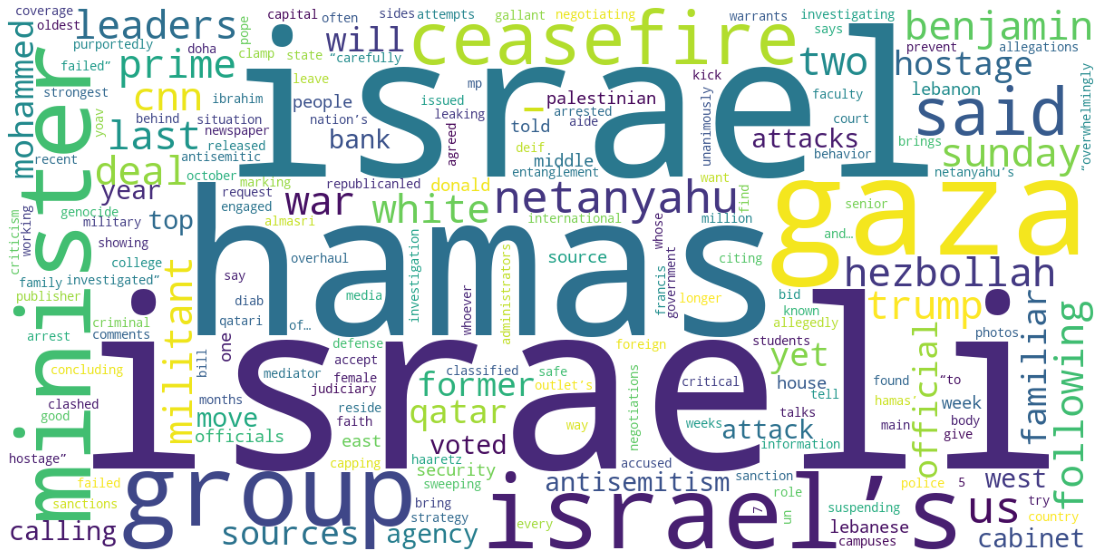

In [49]:
#make_world_cloud('coronavirus','the-verge',100)
make_world_cloud('hamas','cnn',100)

In [ ]:
make_world_cloud('hamas','bbc-news',100)

Before cleaning
What will Matt Gaetz do now that he has withdrawn his attorney general nomination and resigned his seat in the U.S. House of Representatives? Everything you need to know in order to watch Belgium vs. 

After cleaning
['will', 'matt', 'gaetz', 'now', 'withdrawn', 'attorney', 'general', 'nomination', 'resigned', 'seat', 'us', 'house', 'representatives', 'everything', 'need', 'know', 'order', 'watch', 'belgium', 'vs', 'italy', 'uefa', 'nations', 'league', 'soccer', 'action', 'thursday', 'nov', '14', 'everything', 'need', 'know', 'order', 'watch', 'italy', 'vs', 'france', 'uefa', 'nations', 'league', 'soccer', 'action', 'sunday', 'nov', '16', 'taylor', 'fritz', '5', 'world', 'will', 'face', 'jannik', 'sinner', '1', 'november', '17', 'nitto', 'atp', 'finals', 'turin', 'italy', 'tennis', 'channel', 'easily', 'stay', 'top', 'action', 'center', 'cour…', 'taylor', 'fritz', '5', 'world', 'will', 'face', 'alexander', 'zverev', '2', 'november', '16', 'nitto', 'atp', 'finals', 'turi

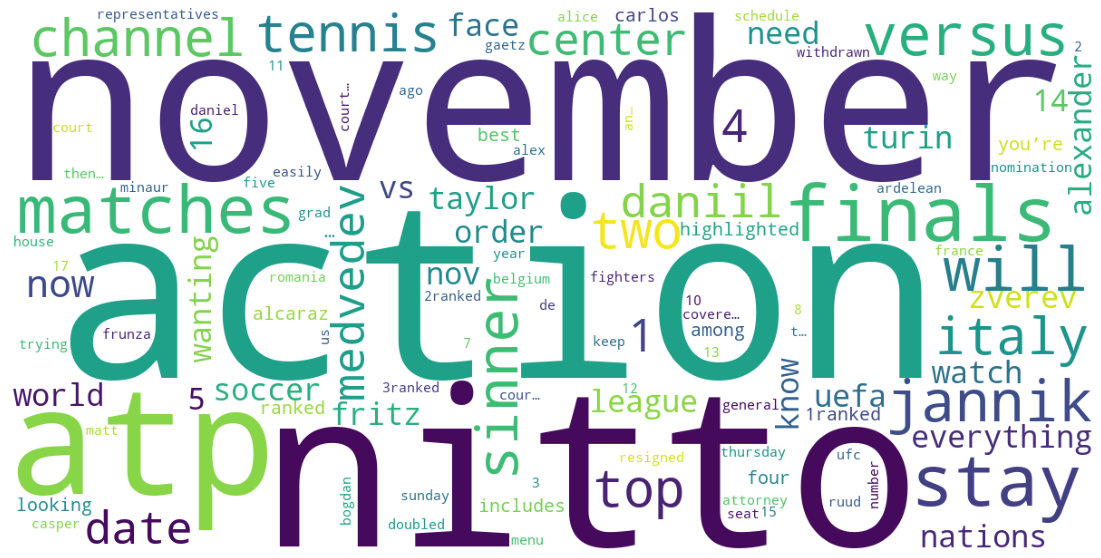

In [52]:
make_world_cloud("italy",'usa-today',100)

Before cleaning
Israel says it is investigating after Hamas released photos purportedly showing the body of a female hostage in Gaza. Vanessa’s Fridays saw her dancing the night away in the night clubs of Liverpool, 

After cleaning
['israel', 'says', 'investigating', 'hamas', 'released', 'photos', 'purportedly', 'showing', 'body', 'female', 'hostage', 'gaza', 'vanessa’s', 'fridays', 'saw', 'dancing', 'night', 'away', 'night', 'clubs', 'liverpool', 'drinks', 'friends', 'sometimes', 'staying', 'night', 'now', 'fridays', 'times', 'prayer', 'new', 'friends', 'mosque', 'took', 'vows', '–', 'shahada', '–', 'become', 'muslim…', 'international', 'criminal', 'court', 'issued', 'arrests', 'warrants', 'israeli', 'prime', 'minister', 'former', 'defence', 'minister', 'crimes', 'humanity', 'warrant', 'issued', 'hamas', 'leader', 'whos', 'believed', 'dead', 'programme', 'russia…', 'qatar', 'says', 'will', 'mediate', 'peace', 'talks', 'israel', 'hamas', 'attitudes', 'sides', 'improve', 'programme', '

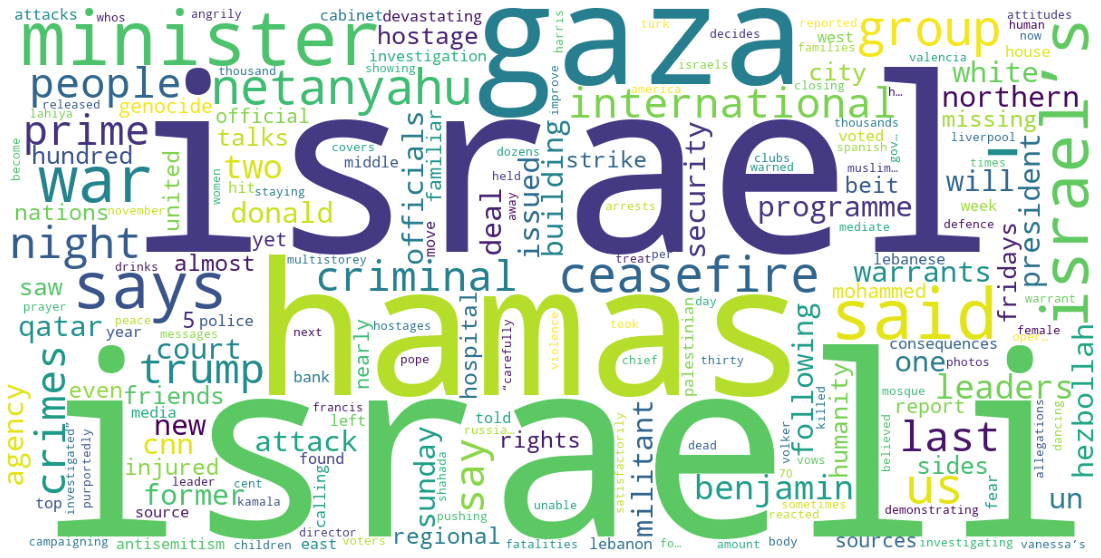

In [31]:
make_world_cloud('hamas','cnn,bbc-news',100)

Before cleaning
Vanessa’s Fridays saw her dancing the night away in the night clubs of Liverpool, having drinks with friends, sometimes staying out all night. But now Fridays are times of prayer with new friends at t

After cleaning
['vanessa’s', 'fridays', 'saw', 'dancing', 'night', 'away', 'night', 'clubs', 'liverpool', 'drinks', 'friends', 'sometimes', 'staying', 'night', 'now', 'fridays', 'times', 'prayer', 'new', 'friends', 'mosque', 'took', 'vows', '–', 'shahada', '–', 'become', 'muslim…', 'international', 'criminal', 'court', 'issued', 'arrests', 'warrants', 'israeli', 'prime', 'minister', 'former', 'defence', 'minister', 'crimes', 'humanity', 'warrant', 'issued', 'hamas', 'leader', 'whos', 'believed', 'dead', 'programme', 'russia…', 'qatar', 'says', 'will', 'mediate', 'peace', 'talks', 'israel', 'hamas', 'attitudes', 'sides', 'improve', 'programme', 'one', 'hundred', 'thirty', 'thousand', 'people', 'demonstrating', 'spanish', 'city', 'valencia', 'regional', 'gov…', 'donald', 't

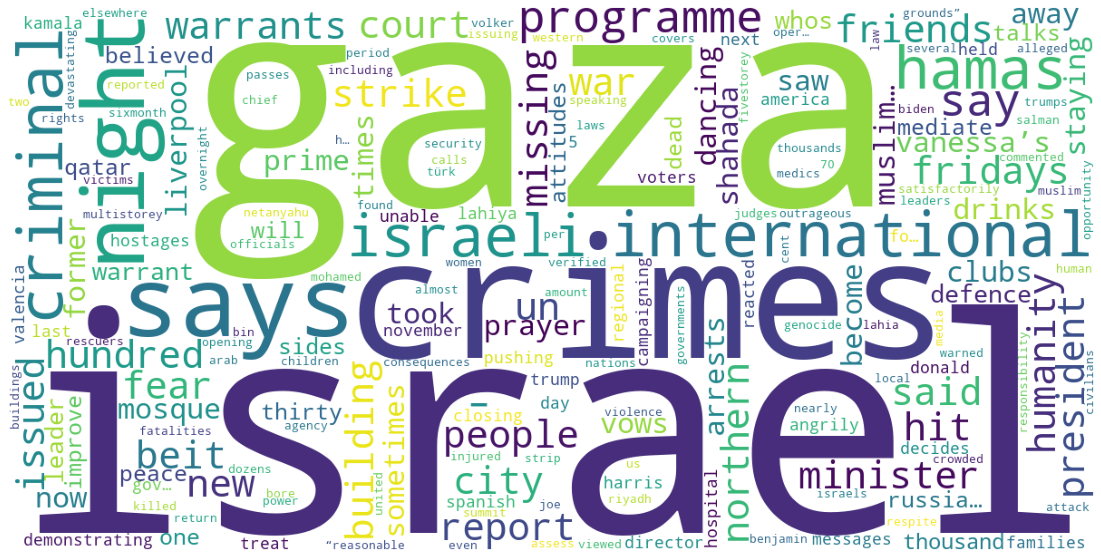

In [34]:
#make_world_cloud('hamas','ars-technica',100)
#make_world_cloud('geopolitics','bbc-news',100)
make_world_cloud('hamas','bbc-news',100)
#make_world_cloud('covid','cnn',100)